**To Get Data**

In [32]:
import yfinance as yf
stock = yf.download("AAPL", start="2020-01-01", end="2025-06-15",
                   group_by="ticker")

/tmp/ipython-input-32-1960885844.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2020-01-01", end="2025-06-15",
[*********************100%***********************]  1 of 1 completed


In [34]:
stock.head()

Ticker           AAPL                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.627077  72.681274  71.373203  72.620827  135480400
2020-01-03  71.847118  72.676447  71.689957  71.914818  146322800
2020-01-06  71.034702  72.526526  70.783241  72.487839  118387200
2020-01-07  72.497529  72.753823  71.926915  72.146942  108872000
2020-01-08  71.849518  73.609729  71.849518  73.307495  132079200

In [33]:
#stock.to_csv("AAPL Stock.csv")

**Analysis**

In [1]:
import pandas as pd
df = pd.read_csv("AAPL Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/2/2020,71.627084,72.681281,71.373211,72.620834,135480400
1,1/3/2020,71.847095,72.676423,71.689935,71.914795,146322800
2,1/6/2020,71.034709,72.526533,70.783248,72.487846,118387200
3,1/7/2020,72.497537,72.753831,71.926922,72.146950,108872000
4,1/8/2020,71.849540,73.609752,71.849540,73.307518,132079200


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2020-01-02 to 2025-06-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1370 non-null   float64
 1   High    1370 non-null   float64
 2   Low     1370 non-null   float64
 3   Close   1370 non-null   float64
 4   Volume  1370 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 96.5 KB


In [36]:
df.describe()

,Open,High,Low,Close,Volume
count,1370.000000,1370.000000,1370.000000,1370.000000,1.370000e+03
mean,157.195404,158.992257,155.539139,157.354490,8.790725e+07
std,44.345554,44.649425,44.059569,44.393008,5.229699e+07
min,55.277751,55.379543,51.528423,54.378590,2.323470e+07
25%,129.255495,130.789639,127.645790,128.976112,5.354532e+07
50%,156.769352,158.670243,154.169022,156.524559,7.371300e+07
75%,186.188546,187.708073,184.486481,186.210621,1.044339e+08
max,257.568678,259.474086,257.010028,258.396667,4.265100e+08


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = full_range.difference(df.index)

In [3]:
len(missing_dates)

620

In [4]:
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df_reindexed = df.reindex(full_range)

dff = df_reindexed.fillna(method='ffill')
dff.head()

/tmp/ipython-input-4-524776834.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dff = df_reindexed.fillna(method='ffill')


,Open,High,Low,Close,Volume
2020-01-02,71.627084,72.681281,71.373211,72.620834,135480400.0
2020-01-03,71.847095,72.676423,71.689935,71.914795,146322800.0
2020-01-04,71.847095,72.676423,71.689935,71.914795,146322800.0
2020-01-05,71.847095,72.676423,71.689935,71.914795,146322800.0
2020-01-06,71.034709,72.526533,70.783248,72.487846,118387200.0


In [37]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2020-01-02 to 2025-06-13
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1990 non-null   float64
 1   High    1990 non-null   float64
 2   Low     1990 non-null   float64
 3   Close   1990 non-null   float64
 4   Volume  1990 non-null   float64
dtypes: float64(5)
memory usage: 93.3 KB


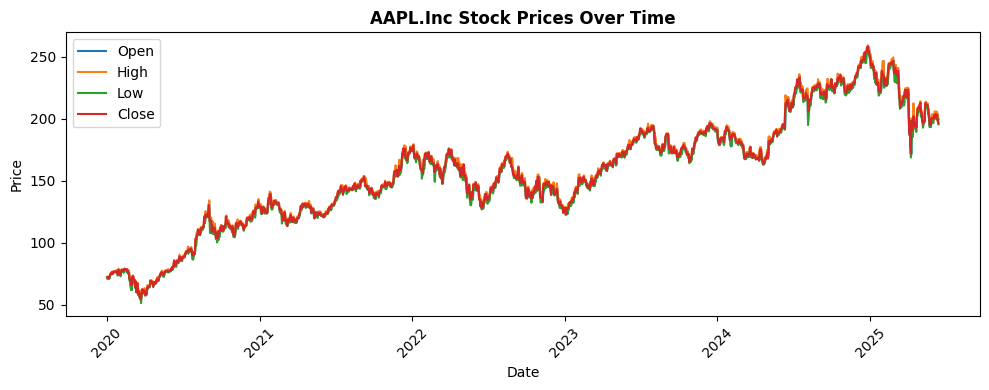

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(dff.index, dff.iloc[:, :4], marker='', linestyle='-')  # Plot first 4 columns

# Add legend for each line
plt.legend(dff.columns[:4], loc='upper left', fontsize='medium', title_fontsize='medium',  prop={'family': 'Times New Roman'})

# Title and labels with specified fonts
plt.title('AAPL.Inc Stock Prices Over Time', fontweight='bold', fontname='Times New Roman')
plt.xlabel('Date', fontname='Times New Roman')
plt.ylabel('Price', fontname='Times New Roman')

# Set y-axis font
plt.yticks(fontname='Times New Roman')

# Remove grid lines
plt.grid(False)

plt.xticks(rotation=45, fontname='Times New Roman')
plt.tight_layout()
plt.show()

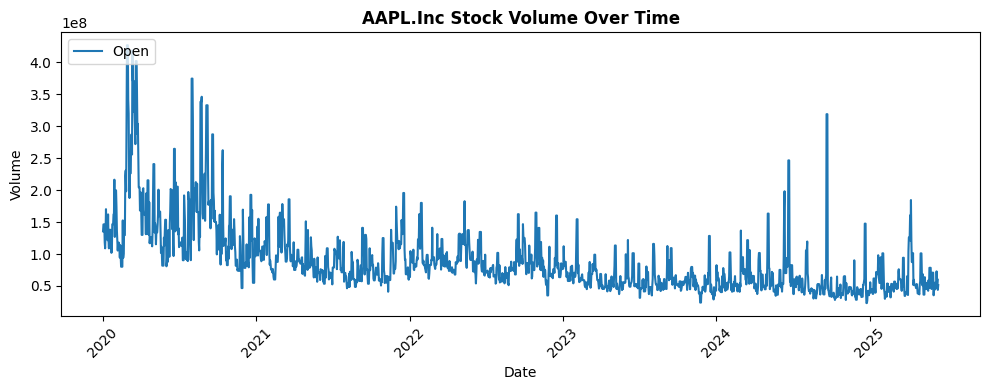

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(dff.index, dff['Volume'], marker='', linestyle='-')  # Plot first 4 columns

# Add legend for each line
plt.legend(dff.columns[:4], loc='upper left', fontsize='medium', title_fontsize='medium',  prop={'family': 'Times New Roman'})

# Title and labels with specified fonts
plt.title('AAPL.Inc Stock Volume Over Time', fontweight='bold', fontname='Times New Roman')
plt.xlabel('Date', fontname='Times New Roman')
plt.ylabel('Volume', fontname='Times New Roman')

# Set y-axis font
plt.yticks(fontname='Times New Roman')

# Remove grid lines
plt.grid(False)

plt.xticks(rotation=45, fontname='Times New Roman')
plt.tight_layout()
plt.show()

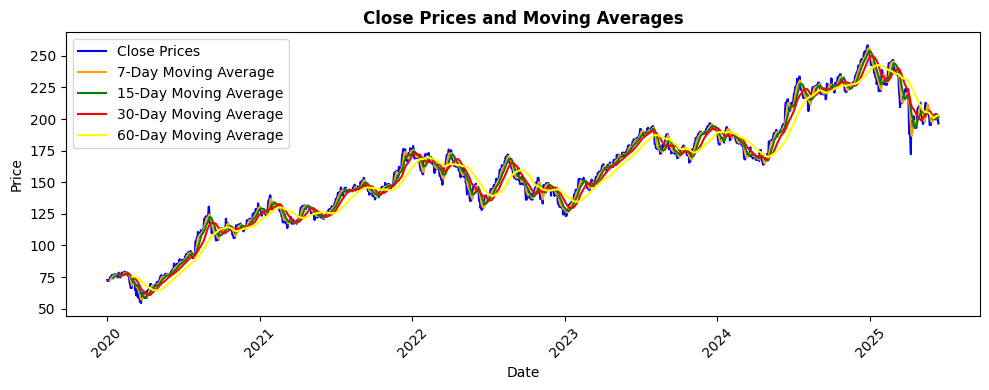

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate moving averages
moving_average_7 = dff['Close'].rolling(window=7).mean()
moving_average_15 = dff['Close'].rolling(window=15).mean()
moving_average_30 = dff['Close'].rolling(window=30).mean()
moving_average_60 = dff['Close'].rolling(window=60).mean()

plt.figure(figsize=(10, 4))

# Plot the original Close prices
plt.plot(dff.index, dff['Close'], label='Close Prices', color='blue')

# Plot moving averages
plt.plot(dff.index, moving_average_7, label='7-Day Moving Average', color='orange')
plt.plot(dff.index, moving_average_15, label='15-Day Moving Average', color='green')
plt.plot(dff.index, moving_average_30, label='30-Day Moving Average', color='red')
plt.plot(dff.index, moving_average_60, label='60-Day Moving Average', color='yellow')

# Add legend
plt.legend(loc='upper left', fontsize='medium', title_fontsize='medium', prop={'family': 'Times New Roman'})

# Title and labels with specified fonts
plt.title('Close Prices and Moving Averages', fontweight='bold', fontname='Times New Roman')
plt.xlabel('Date', fontname='Times New Roman')
plt.ylabel('Price', fontname='Times New Roman')

# Set y-axis font
plt.yticks(fontname='Times New Roman')

# Remove grid lines
plt.grid(False)

plt.xticks(rotation=45, fontname='Times New Roman')
plt.tight_layout()
plt.show()

/tmp/ipython-input-41-3892959381.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize='medium', title_fontsize='medium')


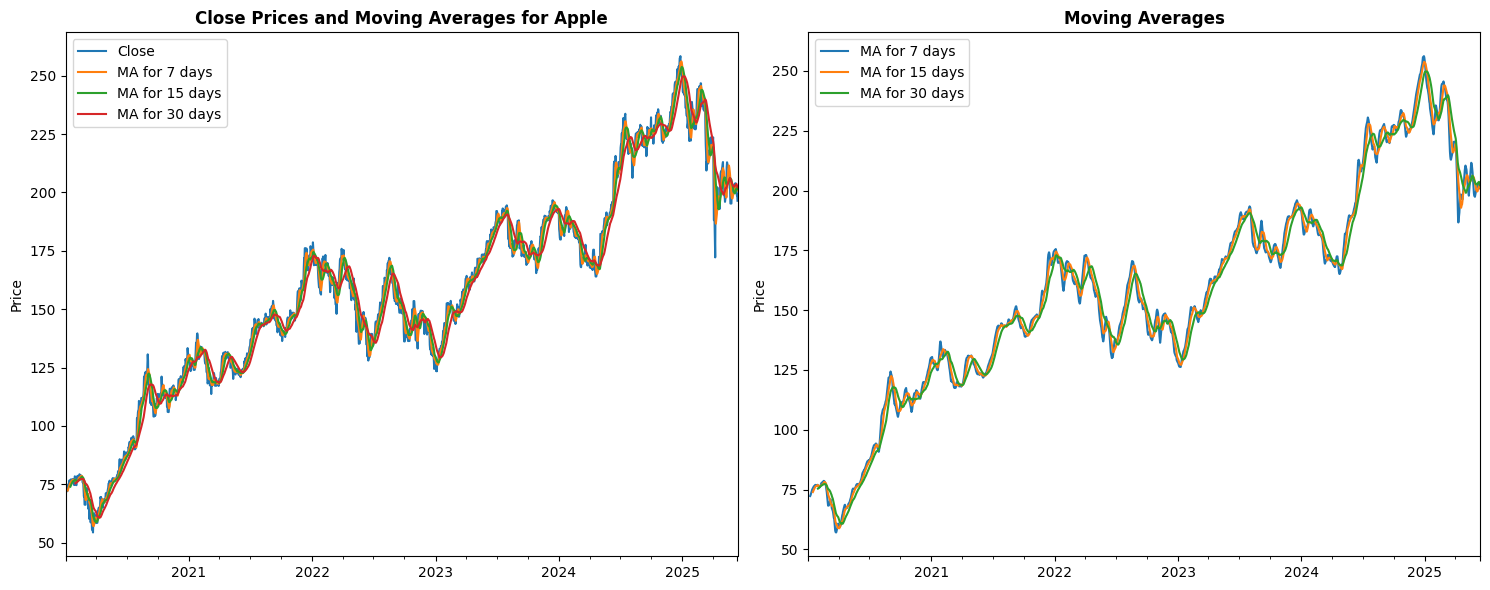

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

ma_days = [7, 15, 30]

for ma in ma_days:
    dff[f'MA for {ma} days'] = dff['Close'].rolling(ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

dff[['Close', 'MA for 7 days', 'MA for 15 days', 'MA for 30 days']].plot(ax=axes[0])
axes[0].set_title('Close Prices and Moving Averages for Apple', fontweight='bold')
axes[0].set_ylabel('Price')
plt.legend(loc='upper left', fontsize='medium', title_fontsize='medium')

dff[['MA for 7 days', 'MA for 15 days', 'MA for 30 days']].plot(ax=axes[1])
axes[1].set_title('Moving Averages', fontweight='bold')
axes[1].set_ylabel('Price')
plt.legend(loc='upper left', fontsize='medium', title_fontsize='medium')

fig.tight_layout()
plt.show()

In [42]:
dff['Daily Return'] = dff['Close'].pct_change()
dff.head(3)

,Open,High,Low,Close,Volume,MA for 7 days,MA for 15 days,MA for 30 days,Daily Return
2020-01-02,71.627084,72.681281,71.373211,72.620834,135480400.0,NaN,NaN,NaN,NaN
2020-01-03,71.847095,72.676423,71.689935,71.914795,146322800.0,NaN,NaN,NaN,-0.009722
2020-01-04,71.847095,72.676423,71.689935,71.914795,146322800.0,NaN,NaN,NaN,0.000000


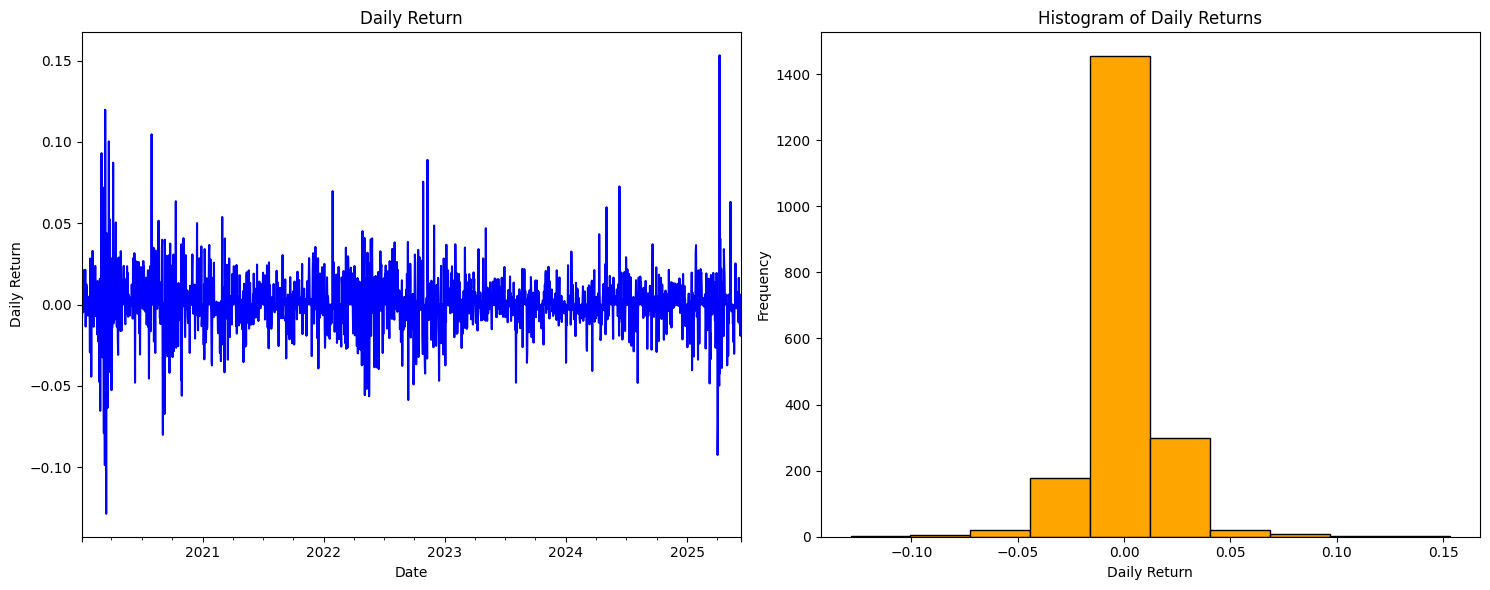

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Line graph for daily return
dff['Daily Return'].plot(ax=axes[0], title='Daily Return', color='blue')
axes[0].set_ylabel('Daily Return')
axes[0].set_xlabel('Date')

# Histogram for daily return
dff['Daily Return'].hist(ax=axes[1], bins=10, color='orange', edgecolor='black')
axes[1].set_title('Histogram of Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Daily Return')

fig.tight_layout()
plt.grid(False)
plt.show()

In [45]:
# Calculate expected return and risk (standard deviation)
expected_return = dff['Daily Return'].mean()
risk = dff['Daily Return'].std()

print(f"Expected Return: {expected_return:.4f}")
print(f"Risk (Standard Deviation): {risk:.4f}")


Expected Return: 0.0006
Risk (Standard Deviation): 0.0171


- The daily return of the stock is approximately 0.06% per day, which suggests a potential for profit, though modest.
- A standard deviation of 0.0171 means that daily returns typically fluctuate by about 1.71% around the average daily return.

Investors should weigh the expected return against the risk before making investment decisions. Higher potential returns usually come with higher risk.

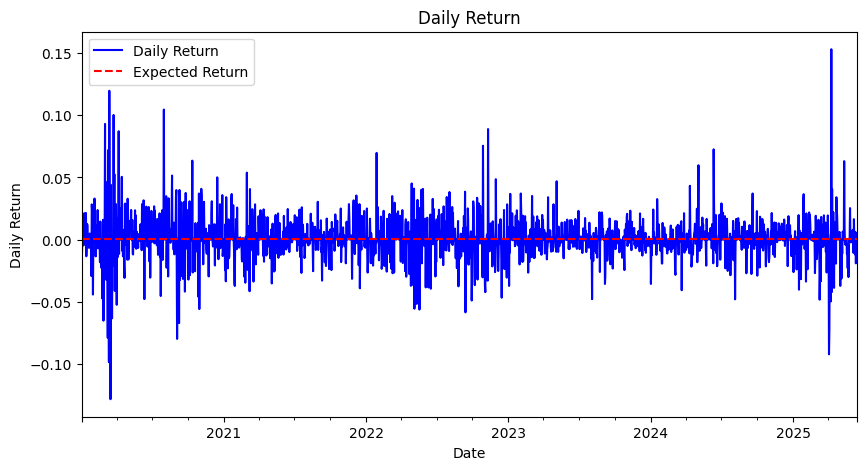

In [46]:

# Optional: Plotting daily return
fig, ax = plt.subplots(figsize=(10, 5))
dff['Daily Return'].plot(title='Daily Return', color='blue')
ax.axhline(expected_return, color='red', linestyle='--', label='Expected Return')
ax.set_ylabel('Daily Return')
ax.set_xlabel('Date')
plt.legend()
plt.show()

**Forecasting**

In [6]:
df_lstm = dff.copy()

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df_lstm[['Close']].values
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [28]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

#Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0330
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0022
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0022
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0023
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0023
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0021
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0017
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0018
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0016
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0016
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0016
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0017
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0015
Epoch 15/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0017
E

In [29]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Metrics
mae = mean_absolute_error(y_test_inverse, predictions)
mse = mean_squared_error(y_test_inverse, predictions)
r2 = r2_score(y_test_inverse, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Mean Absolute Error: 3.10
Mean Squared Error: 22.25
R^2 Score: 0.94


In [30]:
lstm_df = pd.DataFrame({
    "Actual": y_test_inverse.flatten(),
    "Prediction": predictions.flatten()
})
lstm_df

,Actual,Prediction
0,242.066071,236.885513
1,242.425201,239.178467
2,242.455124,240.806946
3,242.255600,241.370422
4,242.255600,241.234177
...,...,...
188,201.449997,203.881729
189,202.669998,202.899200
190,198.779999,202.463135
191,199.199997,200.718765


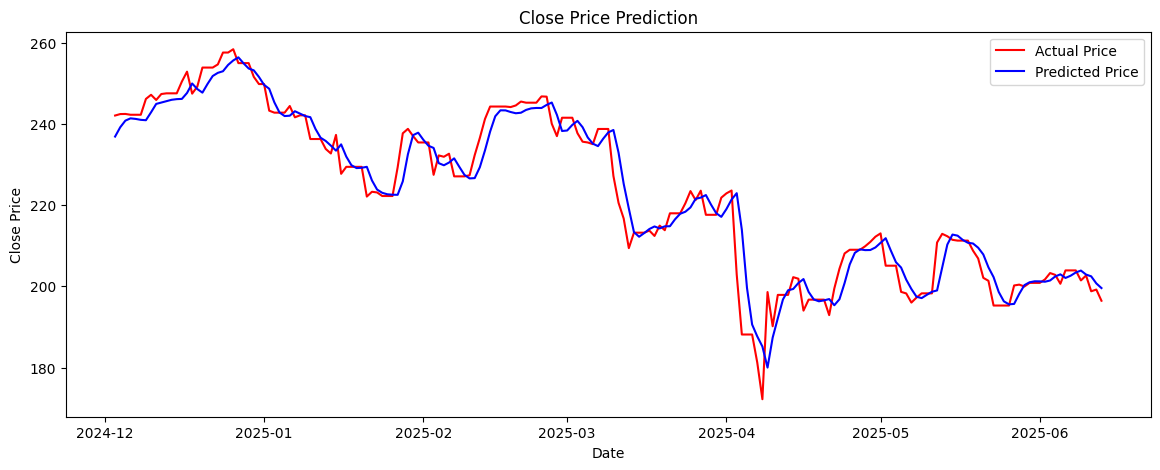

In [31]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(df_lstm.index[len(df_lstm) - len(y_test):], y_test_inverse, color='red', label='Actual Price')
plt.plot(df_lstm.index[len(df_lstm) - len(y_test):], predictions, color='blue', label='Predicted Price')
plt.title('Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

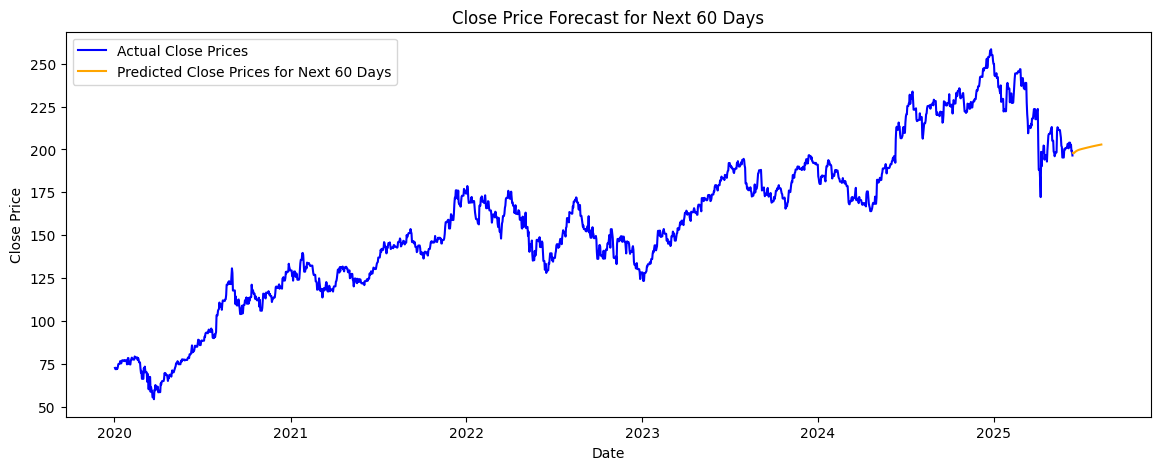

              Forecast
2025-06-14  197.983231
2025-06-15  197.682571
2025-06-16  197.830750
2025-06-17  198.096664
2025-06-18  198.366928
2025-06-19  198.612946
2025-06-20  198.831497
2025-06-21  199.024704
2025-06-22  199.195435
2025-06-23  199.346512
2025-06-24  199.480652
2025-06-25  199.600571
2025-06-26  199.708801
2025-06-27  199.807571
2025-06-28  199.898849
2025-06-29  199.984314
2025-06-30  200.065292
2025-07-01  200.142929
2025-07-02  200.218109
2025-07-03  200.291473
2025-07-04  200.363632
2025-07-05  200.434921
2025-07-06  200.505630
2025-07-07  200.575912
2025-07-08  200.645935
2025-07-09  200.715729
2025-07-10  200.785309
2025-07-11  200.854721
2025-07-12  200.923889
2025-07-13  200.992813
2025-07-14  201.061432
2025-07-15  201.129715
2025-07-16  201.197632
2025-07-17  201.265121
2025-07-18  201.332153
2025-07-19  201.398727
2025-07-20  201.464783
2025-07-21  201.530334
2025-07-22  201.595383
2025-07-23  201.659882
2025-07-24  201.723831
2025-07-25  201.787262
2025-07-26 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the last 60 days of data
last_days = df_lstm['Close'].values[-60:]  # Get last 60 days of actual data
last_days_scaled = scaler.transform(last_days.reshape(-1, 1))  # Scale the data

# Create the input shape for the model
input_data = last_days_scaled.reshape((1, seq_length, 1))

# Generate predictions for the next 60 days
predictions = []

for _ in range(60):
    # Make prediction
    next_pred = model.predict(input_data)
    predictions.append(next_pred[0, 0])  # Store the predicted value

    # Update input_data: append the prediction and remove the oldest value
    next_pred_reshaped = next_pred.reshape(1, 1, 1)  # Reshape for consistency
    input_data = np.append(input_data[:, 1:, :], next_pred_reshaped, axis=1)

# Step 3: Inverse transform the predictions to original scale
predictions = np.array(predictions).reshape(-1, 1)
predictions_inverse = scaler.inverse_transform(predictions)

# Step 4: Create a DataFrame for the predictions
forecast_index = pd.date_range(start=df_lstm.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')
forecast_df = pd.DataFrame(predictions_inverse, index=forecast_index, columns=['Forecast'])

# Step 5: Plot the results
plt.figure(figsize=(14, 5))
plt.plot(df_lstm['Close'], label='Actual Close Prices', color='blue')
plt.plot(forecast_df['Forecast'], label='Predicted Close Prices for Next 60 Days', color='orange')
plt.title('Close Price Forecast for Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(forecast_df)